In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

reduced = PCA(10).fit_transform(unembed_norm.T)
xy = TSNE(2, perplexity=30, verbose=2, init='pca', learning_rate='auto').fit_transform(reduced)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50257 samples in 0.058s...
[t-SNE] Computed neighbors for 50257 samples in 9.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50257
[t-SNE] Computed conditional probabilities for sample 2000 / 50257
[t-SNE] Computed conditional probabilities for sample 3000 / 50257
[t-SNE] Computed conditional probabilities for sample 4000 / 50257
[t-SNE] Computed conditional probabilities for sample 5000 / 50257
[t-SNE] Computed conditional probabilities for sample 6000 / 50257
[t-SNE] Computed conditional probabilities for sample 7000 / 50257
[t-SNE] Computed conditional probabilities for sample 8000 / 50257
[t-SNE] Computed conditional probabilities for sample 9000 / 50257
[t-SNE] Computed conditional probabilities for sample 10000 / 50257
[t-SNE] Computed conditional probabilities for sample 11000 / 50257
[t-SNE] Computed conditional probabilities for sample 12000 / 50257
[t-SNE] Computed conditional probabilities for sam

/home/giles/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 98.9306488, gradient norm = 0.0025907 (50 iterations in 12.802s)
[t-SNE] Iteration 100: error = 96.1471710, gradient norm = 0.0010857 (50 iterations in 11.675s)
[t-SNE] Iteration 150: error = 95.1120071, gradient norm = 0.0007257 (50 iterations in 11.560s)
[t-SNE] Iteration 200: error = 94.5323792, gradient norm = 0.0005535 (50 iterations in 11.451s)
[t-SNE] Iteration 250: error = 94.1628952, gradient norm = 0.0004456 (50 iterations in 11.400s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.162895
[t-SNE] Iteration 300: error = 4.2042904, gradient norm = 0.0005795 (50 iterations in 10.647s)
[t-SNE] Iteration 350: error = 3.6533628, gradient norm = 0.0002820 (50 iterations in 10.546s)
[t-SNE] Iteration 400: error = 3.3626347, gradient norm = 0.0001744 (50 iterations in 10.174s)
[t-SNE] Iteration 450: error = 3.1783714, gradient norm = 0.0001225 (50 iterations in 10.024s)
[t-SNE] Iteration 500: error = 3.0479259, gradient norm = 0.000

/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


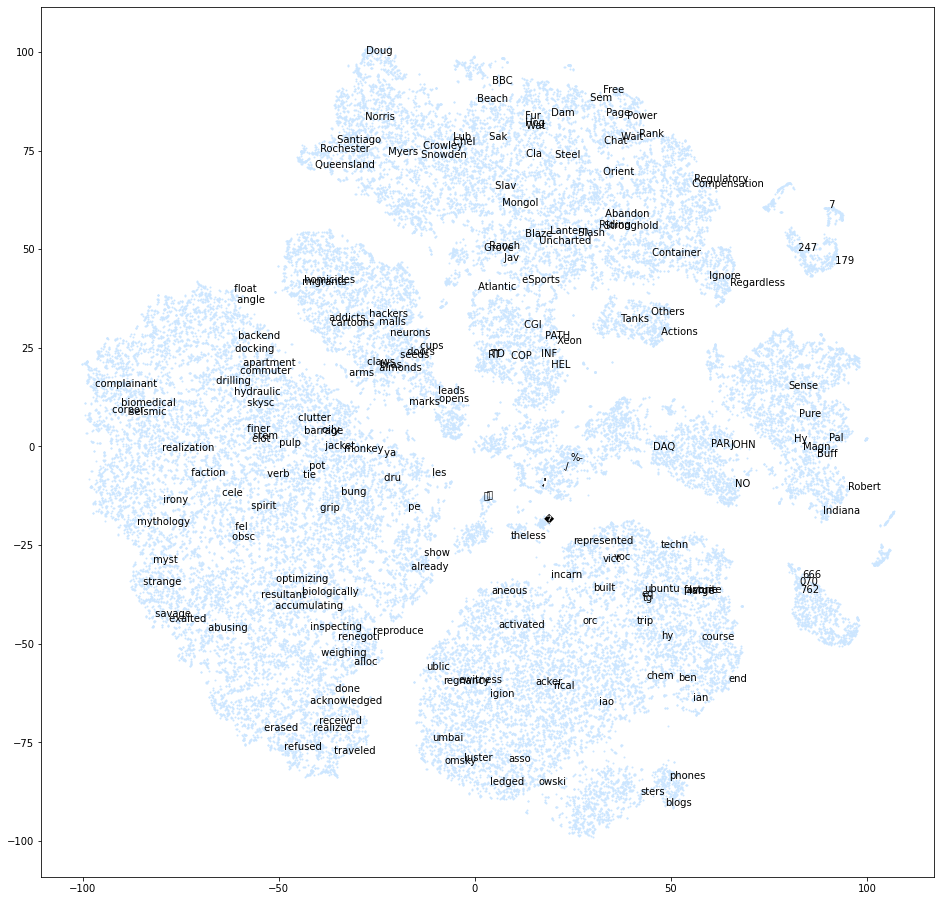

In [15]:
import matplotlib.pyplot as plt
import random
plt.rcParams['figure.figsize'] = [16, 16]

plt.scatter(xy[:,0], xy[:,1], s=1, color=(0.8,0.9,1))

random.seed(12345)
for i in random.sample(range(d_V),k=200):
    plt.text(xy[i,0], xy[i,1], decode(i), parse_math=False)